# Pandas Datetime Capabilities and Visualizations

Pandas' datetime objects makes it possible to accomplish complex datetime operations in just a few lines of code.

In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib for visualizations
import matplotlib.pyplot as plt


### 1. Data Preparation
Merge the charts and the tracks datasets. Repeat the process from the previous notebook

In [2]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [3]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


View track feature distribution

In [4]:
df = charts_df.merge(tracks_df, on='track_id', how='left')

df = df.drop(columns='track_name_y')
df = df.rename(columns={'track_name_x':'track_name'})

df.head()

,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


### 2. Pandas Time Series Aggregation Capabilties
A *time series* is any data that is indexed by some measure of time. 

A *time series plot* is a graph where some measure of time is the unit on the x-axis, often called the time-axis. The y-axis is for the variable that is being measured. 

Pandas has some quick one-liners to help you operate on time series data.

##### 2.1. Resampling

With a datetime object set as index, a pandas dataframe can be aggregated in time with one simple line!

In [5]:
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [6]:
#get total yearly streams
yr_df = df['streams'].resample('Y').sum() #M for month
yr_df

date
2017-12-31    3242144459
2018-12-31    3467089600
2019-12-31    4081571771
2020-12-31    4000302402
2021-12-31    1504082778
Freq: A-DEC, Name: streams, dtype: int64

Text(0.5, 1.0, 'Spotify Yearly Total Streams')

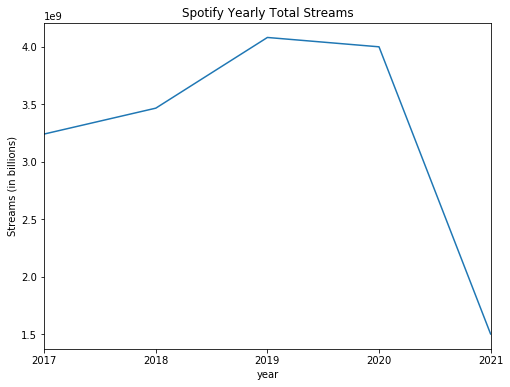

In [7]:
#bar chart of yearly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
yr_df.plot(ax=ax)

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y') for x in yr_df.index], rotation=0)

plt.xlabel('year')
plt.ylabel('Streams (in billions)')
plt.title('Spotify Yearly Total Streams')

In [8]:
#get total monthly streams
mon_df = df['streams'].resample('MS').sum() #M for month
mon_df

date
2017-01-01    266793359
2017-02-01    257152832
2017-03-01    308660052
2017-04-01    258623055
2017-05-01    247044780
2017-06-01    246358983
2017-07-01    270501325
2017-08-01    266984844
2017-09-01    281515635
2017-10-01    282431008
2017-11-01    269195623
2017-12-01    286882963
2018-01-01    281230105
2018-02-01    271188277
2018-03-01    286735761
2018-04-01    270453269
2018-05-01    286514347
2018-06-01    281181083
2018-07-01    290420279
2018-08-01    286865491
2018-09-01    264549769
2018-10-01    316535375
2018-11-01    310459901
2018-12-01    320955943
2019-01-01    336261153
2019-02-01    329369841
2019-03-01    349458593
2019-04-01    315993125
2019-05-01    317290201
2019-06-01    307560749
2019-07-01    341420972
2019-08-01    348835864
2019-09-01    340254556
2019-10-01    361953677
2019-11-01    356435728
2019-12-01    376737312
2020-01-01    386949218
2020-02-01    373569531
2020-03-01    343451485
2020-04-01    273068617
2020-05-01    282020357
2020-06-01 

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

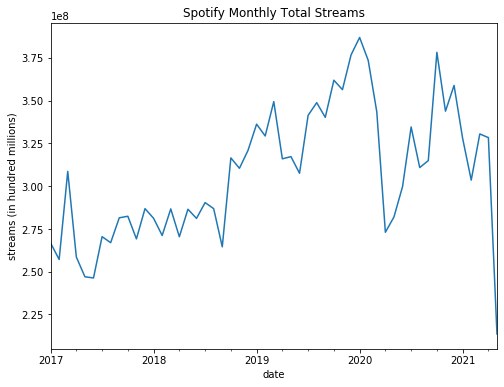

In [9]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
mon_df.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Q: Compute for the artist *BLACKPINK*'s total yearly streams from 2018-2020

In [10]:
df[df['artist']=='BLACKPINK']['streams'].resample('Y').sum()

date
2017-12-31      2150264
2018-12-31     30590001
2019-12-31     75080233
2020-12-31    139684391
2021-12-31     31612129
Freq: A-DEC, Name: streams, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

#### 2.2 First-Order differencing

At times, we might be more interested in the change of a quantity in time rather than the absolute quantities. We use `df.diff()` for this

In [11]:
# month - previous month
delta_mon_df = mon_df.diff()
delta_mon_df

date
2017-01-01            NaN
2017-02-01     -9640527.0
2017-03-01     51507220.0
2017-04-01    -50036997.0
2017-05-01    -11578275.0
2017-06-01      -685797.0
2017-07-01     24142342.0
2017-08-01     -3516481.0
2017-09-01     14530791.0
2017-10-01       915373.0
2017-11-01    -13235385.0
2017-12-01     17687340.0
2018-01-01     -5652858.0
2018-02-01    -10041828.0
2018-03-01     15547484.0
2018-04-01    -16282492.0
2018-05-01     16061078.0
2018-06-01     -5333264.0
2018-07-01      9239196.0
2018-08-01     -3554788.0
2018-09-01    -22315722.0
2018-10-01     51985606.0
2018-11-01     -6075474.0
2018-12-01     10496042.0
2019-01-01     15305210.0
2019-02-01     -6891312.0
2019-03-01     20088752.0
2019-04-01    -33465468.0
2019-05-01      1297076.0
2019-06-01     -9729452.0
2019-07-01     33860223.0
2019-08-01      7414892.0
2019-09-01     -8581308.0
2019-10-01     21699121.0
2019-11-01     -5517949.0
2019-12-01     20301584.0
2020-01-01     10211906.0
2020-02-01    -13379687.0
2020-03

Q: How did Spotify streams grow month-on-month from 2017 to 2020?

Text(0.5, 1.0, 'Spotify Month-on-Month Stream Growth')

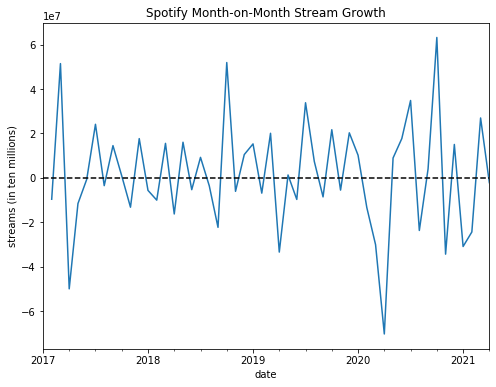

In [12]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
#omit incomplete month
delta_mon_df[:-1].plot(ax=ax)

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

#add reference line at y=0
plt.axhline(0, color='k', ls='--')

plt.ylabel('streams (in ten millions)')
plt.title('Spotify Month-on-Month Stream Growth')

> Q: Can you show the above month-on-month growth plot as a percentage of the previous month?

#### 2.3 Cummulative sum

We compute for the cummulative sum using `df.cumsum()`

In [13]:
#get cummulative total spotify monthly streams
mon_df.cumsum()

date
2017-01-01      266793359
2017-02-01      523946191
2017-03-01      832606243
2017-04-01     1091229298
2017-05-01     1338274078
2017-06-01     1584633061
2017-07-01     1855134386
2017-08-01     2122119230
2017-09-01     2403634865
2017-10-01     2686065873
2017-11-01     2955261496
2017-12-01     3242144459
2018-01-01     3523374564
2018-02-01     3794562841
2018-03-01     4081298602
2018-04-01     4351751871
2018-05-01     4638266218
2018-06-01     4919447301
2018-07-01     5209867580
2018-08-01     5496733071
2018-09-01     5761282840
2018-10-01     6077818215
2018-11-01     6388278116
2018-12-01     6709234059
2019-01-01     7045495212
2019-02-01     7374865053
2019-03-01     7724323646
2019-04-01     8040316771
2019-05-01     8357606972
2019-06-01     8665167721
2019-07-01     9006588693
2019-08-01     9355424557
2019-09-01     9695679113
2019-10-01    10057632790
2019-11-01    10414068518
2019-12-01    10790805830
2020-01-01    11177755048
2020-02-01    11551324579
2020-03

Q: Compute for the cummulative total monthly streams of Ben and Ben's 'Kathang Isip' 

In [14]:
df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()

date
2017-12-31       280954
2018-01-31      1143970
2018-02-28      2602759
2018-03-31      5640851
2018-04-30      8612270
2018-05-31     12167968
2018-06-30     16174690
2018-07-31     20711428
2018-08-31     25637997
2018-09-30     30259253
2018-10-31     36163507
2018-11-30     41730039
2018-12-31     47064210
2019-01-31     52937957
2019-02-28     58122113
2019-03-31     62464276
2019-04-30     65529892
2019-05-31     68589232
2019-06-30     71271137
2019-07-31     74342837
2019-08-31     77746429
2019-09-30     81422570
2019-10-31     85181331
2019-11-30     88677596
2019-12-31     92394161
2020-01-31     96193708
2020-02-29    100263565
2020-03-31    103791352
2020-04-30    106276000
2020-05-31    108745632
2020-06-30    111276239
2020-07-31    113816804
2020-08-31    116409758
2020-09-30    118960089
2020-10-31    121629196
2020-11-30    124116994
2020-12-31    126735698
2021-01-31    129190360
2021-02-28    131446391
2021-03-31    133818454
2021-04-30    136024962
2021-05-31 

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

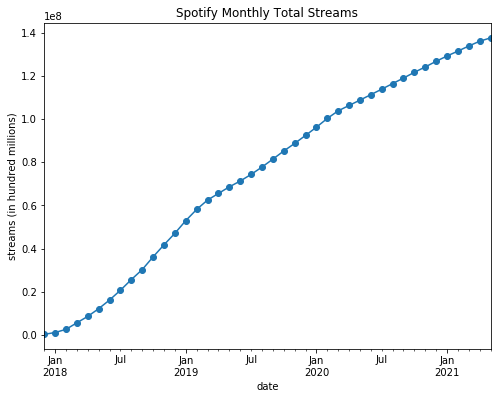

In [15]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data = df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()

data.plot(ax=ax,marker='o')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Q: How does the cummulative total monthly streams of Ed Sheeran's Shape of You compare with  Ben and Ben's 'Kathang Isip' ?

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

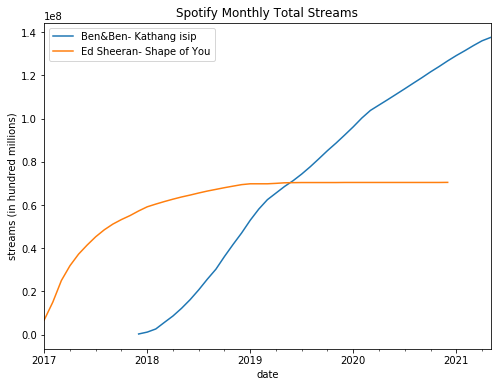

In [16]:
#line chart of monthly streams

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = df[df['track_name']=='Kathang Isip']['streams'].resample('M').sum().cumsum()
data2 = df[df['track_name']=='Shape of You']['streams'].resample('M').sum().cumsum()

data1.plot(ax=ax, label='Ben&Ben- Kathang isip')
data2.plot(ax=ax, label='Ed Sheeran- Shape of You')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

#### 2.4 Rolling window

We can use the function `.rolling()` to define a time series window where we could aggregate the target variable

Q: Smooth out daily streams of Ben and Ben's Kathang Isip over a 1-week window

In [17]:
df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean()

date
2017-12-17             NaN
2017-12-18             NaN
2017-12-19             NaN
2017-12-20             NaN
2017-12-21             NaN
                  ...     
2021-05-16    79287.714286
2021-05-17    78405.285714
2021-05-18    78202.142857
2021-05-19    78101.000000
2021-05-20    78183.285714
Name: streams, Length: 1249, dtype: float64

Text(0.5, 1.0, 'Spotify Daily Streams: Ben&Ben- Kathang isip')

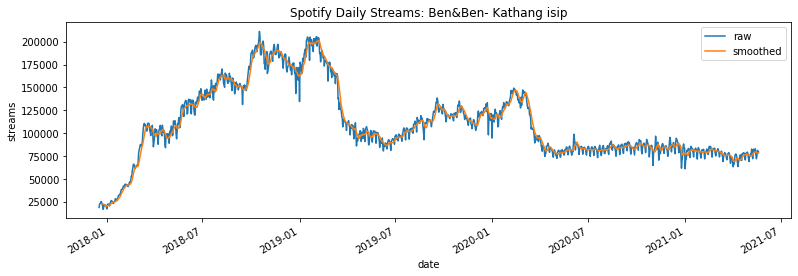

In [18]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[df['track_name']=='Kathang Isip']['streams']
data2 = df[df['track_name']=='Kathang Isip']['streams'].rolling(7).mean()

data1.plot(ax=ax, label='raw')
data2.plot(ax=ax, label='smoothed')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams: Ben&Ben- Kathang isip')


Q: Compare the 7-day smoothed daily streams of Ben and Ben's Kathang Isip and Taylor Swift's Lover

Text(0.5, 1.0, 'Spotify Daily Streams')

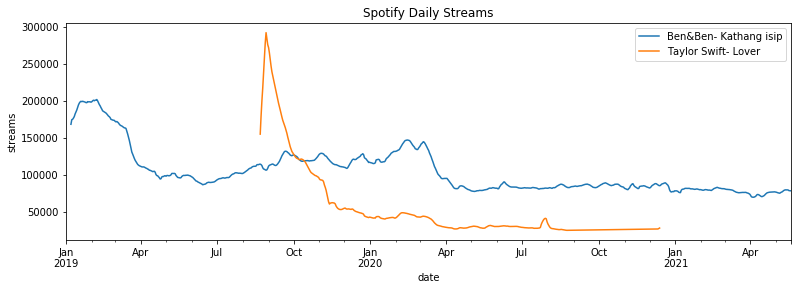

In [19]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[(df.index.year>=2019)&(df['track_name']=='Kathang Isip')]['streams'].rolling(7).mean()
data2 = df[(df.index.year>=2019)&(df['track_name']=='Lover')]['streams'].rolling(7).mean()

data1.plot(ax=ax, label='Ben&Ben- Kathang isip')
data2.plot(ax=ax, label='Taylor Swift- Lover')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams')


>Q: What insights can you infer from the chart above?

Q: Compare the 7-day top chart **position** for Ben & Ben and Ariana Grande

Text(0.5, 1.0, 'Spotify Weekly Top Chart Positions')

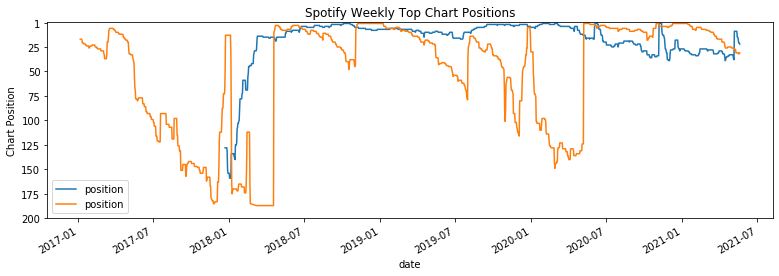

In [20]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

#get top position of all charting songs of the artist per day
data1 = df[df['artist']=='Ben&Ben'].groupby('date')[['position']].min()
#get rolling 7 day minimum of top daily positions
data1 = data1.rolling(7).min()
data2 = df[df['artist']=='Ariana Grande'].groupby('date')[['position']].min()
data2 = data2.rolling(7).min()

data1.plot(ax=ax, label='Ben&Ben')
data2.plot(ax=ax, label='Ariana Grande')

#reverse the yaxis to show 1 on top
plt.ylim([200,0])
plt.yticks([1]+np.arange(25,201,25).tolist())

plt.legend()
plt.ylabel('Chart Position')
plt.title('Spotify Weekly Top Chart Positions')

>Q: What insights can you infer from the chart above?

### 4. Interactive Time-Series plot in Bokeh


In [22]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

from bokeh.models.tools import HoverTool

from bokeh.models import ColumnDataSource, Range1d
output_notebook()

Loading BokehJS ...

>Q: Compare the contribution of the top 1-50 tracks vs top 50-200 tracks in the yearly streams of Spotify

In [23]:
#add is_in_top_50 column in df
df['is_in_top50']=df['position']<=50
df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_in_top50
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,...,2,-6.209,1,0.0454,0.196,0.00000,0.0830,0.301,174.152,True
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,...,10,-7.398,1,0.0590,0.695,0.00000,0.0902,0.494,85.043,True
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,...,8,-5.599,1,0.0338,0.414,0.00000,0.1110,0.661,95.010,True
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,...,0,-8.821,1,0.0307,0.097,0.00272,0.1150,0.296,90.000,True
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,...,7,-6.126,1,0.0800,0.338,0.00000,0.0975,0.447,100.048,True


In [24]:
#get total yearly streams
yr_seg_df = df.groupby('is_in_top50')[['streams']].resample('Y').sum().reset_index()
yr_seg_df

,is_in_top50,date,streams
0,False,2017-12-31,1481837664
1,False,2018-12-31,1668946877
2,False,2019-12-31,1891969422
3,False,2020-12-31,1926980058
4,False,2021-12-31,81332071
5,True,2017-12-31,1760306795
6,True,2018-12-31,1798142723
7,True,2019-12-31,2189602349
8,True,2020-12-31,2073322344
9,True,2021-12-31,74138295


In [25]:
p = figure(title="Spotify Yearly Streams for Charting Tracks",plot_width=500, plot_height=300)
data = yr_seg_df
p.vbar(x=yr_df.index.year.values-0.15,\
       top=data[data['is_in_top50']==True]['streams'].values/1000000000,
       width=0.2, bottom=0, color="crimson", legend_label='Top50')
p.vbar(x=yr_df.index.year.values+0.15,\
       top=data[data['is_in_top50']==True]['streams'].values/1000000000,
       width=0.2, bottom=0, color="dodgerblue", legend_label='Top51-100')

p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Streams (in billions)'

p.legend.label_text_font_size = '8pt'
p.legend.click_policy="hide"

show(p)

>Q: What insights can you infer from the chart above?

Convert the time series static plots into Bokeh charts

In [26]:
#Simple time series plot with Viz
from bokeh.models import Range1d

p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Position'
p.y_range.flipped = True
p.y_range=Range1d(200,0.5)

p.yaxis.ticker = [1,50,100,150,200]
#p.xaxis.major_label_overrides = {1: 'A', 2: 'B', 3: 'C'}

artists = ['Ariana Grande','Ben&Ben']
colors=['orange','blue']
for n,artist in enumerate(artists):
    artist_df = pd.DataFrame({'date':pd.unique(df.index)}).set_index('date')
    positions = df[df['artist']==artist].groupby('date')[['position']].min().rolling(7).min()
    artist_df['position'] = positions
    artist_df = artist_df.reset_index()
    
    #add .flatten() to y-values to deal with rolling window value nesting
    p.line(artist_df['date'], artist_df['position'], color=colors[n],legend_label=artist)
    

p.legend.location = "bottom_right"
p.legend.click_policy="hide"

show(p)

In [27]:
#Simple time series plot with selectable legend and hover output

p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)

#reformat data to suit ColumnDataSource
artists = ['Ariana Grande','Ben&Ben']
colors=['blue','orange','red']
for n,artist in enumerate(artists):
    artist_df = pd.DataFrame({'date':pd.unique(df.index)}).set_index('date')
    top5songs = df[(df['artist']==artist)].groupby(['track_name'])[['streams']].sum()\
                                            .sort_values(by='streams', ascending=False)[:5].reset_index()['track_name']
    positions = df[(df['artist']==artist)&(df['track_name'].isin(top5songs))].groupby('date')[['position']].min().rolling(7).min()
    artist_df['position'] = positions
    artist_df = artist_df.reset_index()
    artist_df['artist'] = artist

    source = ColumnDataSource(data = {'date': artist_df['date'].values,
                                      'position': artist_df['position'].values,
                                      'artist': artist_df['artist'].values})
    
    #add .flatten() to y-values to deal with rolling window value nesting
    p.line(x='date', y='position', color=colors[n], source=source, legend_label=artist)
    #add hover tool
    p.add_tools(HoverTool(
        tooltips=[
                ( 'date',   '@date{%F}'),
                ( 'position',  '@position' ), # use @{ } for field names with spaces
                ( 'artist', '@artist'      ),
            ],
        formatters={
            '@date' : 'datetime',
        }
    ))

#plot formatting
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Position'
p.y_range.flipped = True
p.y_range=Range1d(200,0)
p.yaxis.ticker = [1,50,100,150,200]

p.legend.location = "bottom_right"
p.legend.click_policy="hide"

show(p)

## Try it yourself!

1. Among those included in the Spotify charts, pick 1 artist you like to analyze. 

   a. Plot the streams and positions of their top 5 streamed songs.
   
   b. Compare these charts with streams and positions of what you feel to be a possible collaborator/competitor/related artist. 

   What insights can you draw from the data?